In [19]:
import pandas as pd 
import geopandas as gpd
from find_clusters import *
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv("results.csv")

In [4]:
geo_results = pd.read_csv("geo_results.csv")

In [5]:
results.sort_values("label", ascending = False).head() 

,Unnamed: 0,ACCOUNT NUMBER,SITE NUMBER,score,label
0,303,6,1,0.210885,1
738,40590,351,1,0.210885,1
744,40596,351,1,0.210885,1
743,40595,351,1,0.210885,1
742,40594,351,1,0.210885,1


In [6]:
Cook_tracts_shp = gpd.read_file(TRACT_SHAPEFILE)

In [7]:
Cook_tracts_shp.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,031,030101,17031030101,301.01,Census Tract 301.01,G5020,S,122359,115695,+41.9913475,-087.6550420,"POLYGON ((-87.66033899999999 41.992286, -87.66..."
1,17,031,030701,17031030701,307.01,Census Tract 307.01,G5020,S,69878,0,+41.9827453,-087.6579659,"POLYGON ((-87.66006899999999 41.983622, -87.65..."
2,17,031,070103,17031070103,701.03,Census Tract 701.03,G5020,S,69094,0,+41.9268110,-087.6426051,"POLYGON ((-87.644217 41.92805, -87.64381400000..."
3,17,031,807100,17031807100,8071,Census Tract 8071,G5020,S,1528033,0,+42.0444535,-087.7210786,"POLYGON ((-87.732606 42.040944, -87.7325989999..."
4,17,031,807200,17031807200,8072,Census Tract 8072,G5020,S,2489125,0,+42.0371751,-087.7285103,"POLYGON ((-87.74728899999999 42.033694, -87.74..."


In [20]:
geo_results["GEOID"] = geo_results["GEOID"].astype(str)

In [21]:
gdf = Cook_tracts_shp.merge(geo_results, how = "left")

In [29]:
gdf = gdf.fillna(0)
gdf['log-label'] = np.log(gdf['label'] + 1)
gdf = gdf.loc[gdf["GEOID"] != "17031990000"]

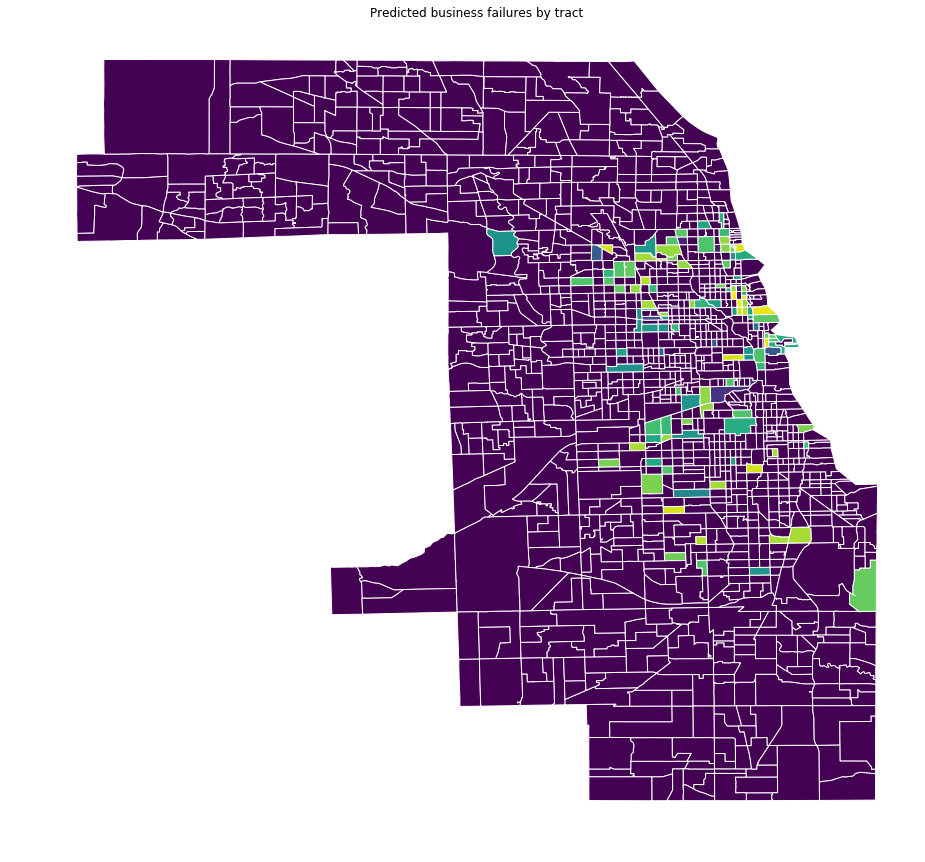

In [30]:
ax3 = gdf.plot(column = "log-label",
                    edgecolor='white',
                    figsize=(18, 15))

# Some visual tweaks
plt.title('Predicted business failures by tract')
plt.axis('off')
plt.savefig("plotmap.png", dpi = 300)

In [18]:
gdf.sort_values("label", ascending=True)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Unnamed: 0,ACCOUNT NUMBER,SITE NUMBER,score,label,log-label
0,17,031,030101,17031030101,301.01,Census Tract 301.01,G5020,S,122359,115695,+41.9913475,-087.6550420,"POLYGON ((-87.66033899999999 41.992286, -87.66...",25.0,173803840.0,8939.0,357.027900,0.0,0.0
883,17,031,063200,17031063200,632,Census Tract 632,G5020,S,366717,397543,+41.9389231,-087.6346726,"POLYGON ((-87.6444 41.940045, -87.644158 41.94...",102.0,268883833.0,3352.0,465.211783,0.0,0.0
885,17,031,090300,17031090300,903,Census Tract 903,G5020,S,475842,0,+41.9991127,-087.8163644,"POLYGON ((-87.821404 41.996922, -87.821403 41....",145.0,11493344.0,41.0,6.959197,0.0,0.0
886,17,031,100100,17031100100,1001,Census Tract 1001,G5020,S,1182384,0,+41.9895840,-087.7830136,"POLYGON ((-87.787727 41.983306, -87.787723 41....",146.0,104599220.0,1696.0,128.639704,0.0,0.0
887,17,031,100300,17031100300,1003,Census Tract 1003,G5020,S,2286205,0,+41.9887024,-087.8044027,"POLYGON ((-87.816728 41.991515, -87.816734 41....",148.0,21790871.0,181.0,18.979628,0.0,0.0
888,17,031,140100,17031140100,1401,Census Tract 1401,G5020,S,282494,5489,+41.9712014,-087.7058050,"POLYGON ((-87.708647 41.974523, -87.708439 41....",166.0,170340940.0,1472.0,198.231675,0.0,0.0
891,17,031,140500,17031140500,1405,Census Tract 1405,G5020,S,452819,0,+41.9653619,-087.7318319,"POLYGON ((-87.73790200000001 41.968134, -87.73...",171.0,442234288.0,3309.0,495.790073,0.0,0.0
893,17,031,242700,17031242700,2427,Census Tract 2427,G5020,S,175572,0,+41.8974254,-087.6993742,"POLYGON ((-87.702234 41.896559, -87.701881 41....",302.0,34701590.0,226.0,36.272179,0.0,0.0
896,17,031,070400,17031070400,704,Census Tract 704,G5020,S,324368,0,+41.9289672,-087.6561563,"POLYGON ((-87.65871 41.932556, -87.65845899999...",112.0,613125557.0,12279.0,982.933870,0.0,0.0
881,17,031,062400,17031062400,624,Census Tract 624,G5020,S,162936,0,+41.9415556,-087.6662882,"POLYGON ((-87.668763 41.943343, -87.66852 41.9...",94.0,71617133.0,834.0,81.823287,0.0,0.0


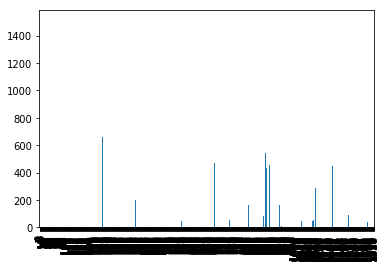

In [13]:
gdf['label'].plot(kind = "bar")

In [14]:
plt.show()

In [15]:
import numpy as np

In [24]:
gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Unnamed: 0,ACCOUNT NUMBER,SITE NUMBER,score,label,log-label
0,17,031,030101,17031030101,301.01,Census Tract 301.01,G5020,S,122359,115695,+41.9913475,-087.6550420,"POLYGON ((-87.66033899999999 41.992286, -87.66...",25.0,173803840.0,8939.0,357.027900,0.0,0.000000
1,17,031,030701,17031030701,307.01,Census Tract 307.01,G5020,S,69878,0,+41.9827453,-087.6579659,"POLYGON ((-87.66006899999999 41.983622, -87.65...",36.0,231421906.0,2280.0,454.034890,216.0,5.379897
2,17,031,070103,17031070103,701.03,Census Tract 701.03,G5020,S,69094,0,+41.9268110,-087.6426051,"POLYGON ((-87.644217 41.92805, -87.64381400000...",109.0,308625250.0,4416.0,533.116676,0.0,0.000000
3,17,031,807100,17031807100,8071,Census Tract 8071,G5020,S,1528033,0,+42.0444535,-087.7210786,"POLYGON ((-87.732606 42.040944, -87.7325989999...",0.0,0.0,0.0,0.000000,0.0,0.000000
4,17,031,807200,17031807200,8072,Census Tract 8072,G5020,S,2489125,0,+42.0371751,-087.7285103,"POLYGON ((-87.74728899999999 42.033694, -87.74...",0.0,0.0,0.0,0.000000,0.0,0.000000
